## Author: Partha Ghosal

# Project: – Statistics For Data Science Project

#### Data Description:

##### Context:

Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

##### Attribute Information:

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance.

##### Learning Outcomes:

     Exploratory Data Analysis
     Practicing statistics using Python
     Hypothesis testing

##### Objective:

We want to see if we can dive deep into this data to find some valuable insights.

Steps and tasks:

1. Import the necessary libraries (2 marks)
2. Read the data as a data frame (2 marks)
3. Perform basic EDA which should include the following and print out your insights at every step. (28 marks)
    1. Shape of the data (2 marks)
    2. Data type of each attribute (2 marks)
    3. Checking the presence of missing values (3 marks)
    4. 5 point summary of numerical attributes (3 marks)
    5. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. (4 marks)
    6. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns (2 marks)
    7. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns (4 marks)
    8. Distribution of categorical columns (include children) (4 marks)
    9. Pair plot that includes all the columns of the data frame (4 marks)

4. Answer the following questions with statistical evidence (28 marks)

NB: With whatever approach you use, provide a clear explanation why your approach is the best, to convince business managers to use your approach.

The questions given below are different from the one solved in the live online class and should be read carefully.

    It is believed that people who smoke have higher charges than those who don’t, perform an analysis with the given data to confirm or disprove this. (7 marks)
    Considering different regions, does the BMI of females differ significantly from that of males? (7 marks)
    Is the proportion of smokers significantly different in different genders? (7marks)
    Considering the distribution of BMI across women with no children, one child, two children, three children, and four children the same? (7 marks)


### Project Execution Details Step-wise

In [1]:
# 1. importing the necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, stats
from math import sqrt
from numpy import mean, var

In [7]:
# 2. Reading the data as data frame
data = pd.read_csv("C:\\Users\\EPAAGHL\\Documents\\Personal\\insurance.csv")

In [8]:
# Reading head of the data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### 3. Performing basic EDA
##### 3.1 Shape of the data

In [9]:
data.shape

(1338, 7)

##### 3.2 Data Type of each attribute

In [10]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

##### 3.3 Checking the presence of missing values

In [12]:
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [14]:
null=data.isnull()
for i in null:
    if i=="True":
        print('There are null values')
    else:
        print("There are no null values")

There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values


In [15]:
# alternate approach
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##### 3.4 5 point summary of numeric attributes

In [16]:
# Calculating and printing a 5-number summary
from numpy import percentile

# calculating quartiles
NewData=data.loc[:,['age','bmi','children','charges']]
quartiles = percentile(NewData, [25, 50, 75])

#calculating min/max
data_min, data_max = NewData.min(), NewData.max()

#printing the 5-number summary
print('Min:\n', data_min)
print('....'*10)
print('Q1:\n', quartiles)
print('Median:\n', quartiles)
print('Q3:\n', quartiles)
print('....'*10)
print('Max:\n', data_max)

Min:
 age           18.0000
bmi           15.9600
children       0.0000
charges     1121.8739
dtype: float64
........................................
Q1:
 [ 13.22      32.47     328.468475]
Median:
 [ 13.22      32.47     328.468475]
Q3:
 [ 13.22      32.47     328.468475]
........................................
Max:
 age            64.00000
bmi            53.13000
children        5.00000
charges     63770.42801
dtype: float64


##### 3.5 Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. 

In [17]:
# Selecting only the columns specified for distribution and then checking
DistData=data.loc[:,['bmi','age','charges']]
DistData.head()

,bmi,age,charges
0,27.900,19,16884.92400
1,33.770,18,1725.55230
2,33.000,28,4449.46200
3,22.705,33,21984.47061
4,28.880,32,3866.85520


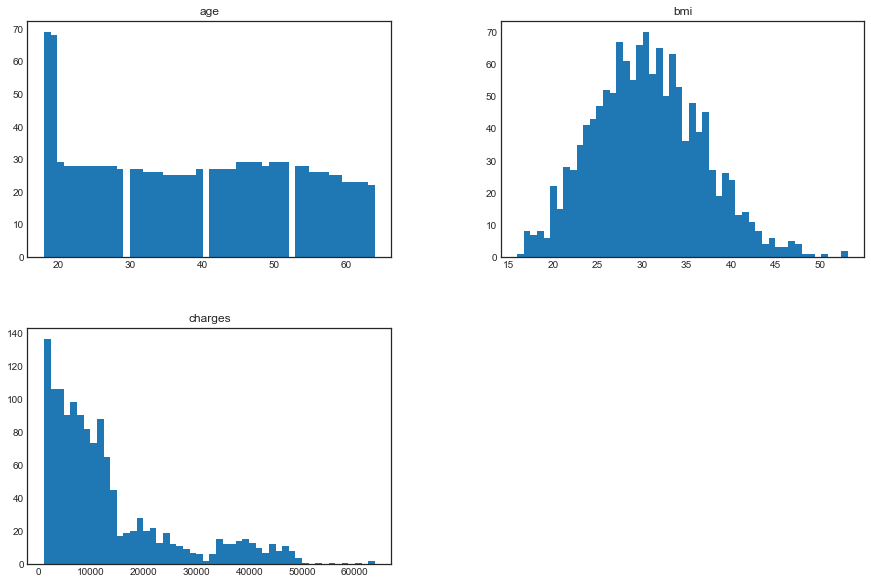

In [19]:
# Histogram distribution of the selected columns
plt.style.use('seaborn-white')
DistData.hist(bins=50, figsize=(15,10),grid=False)
plt.show()

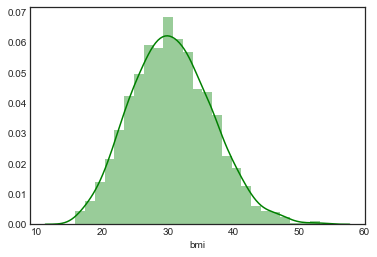

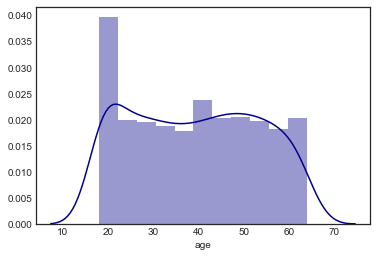

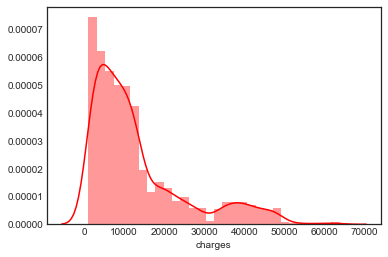

In [20]:
# Distplot showing the distribution of individual columns
sns.distplot( DistData["bmi"] , color="green")
plt.show()
sns.distplot( DistData["age"] , color="darkblue")
plt.show()
sns.distplot( DistData["charges"] , color="red")
plt.show()

##### 3.6 Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [24]:
DistData.skew()

bmi        0.284047
age        0.055673
charges    1.515880
dtype: float64

##### 3.7 Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

Analyzing/viewing the data with outliers

In [25]:
DistData.shape

(1338, 3)

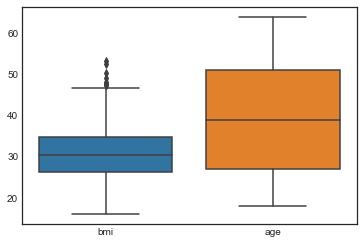

In [26]:
sns.boxplot(data=data.loc[:,['bmi','age']])

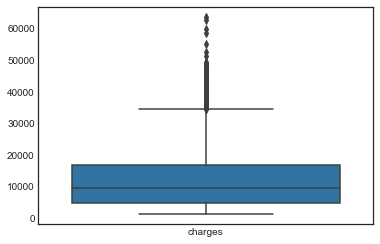

In [27]:
sns.boxplot(data=data.loc[:,['charges']])

From the plots above it is evident that there is presence of outliers in the data. We would use Z-score function defined in scipy library to detect the outliers. Going by industry best practice, we will use a threshold of 3 to identify the outliers and then will remove them from the dataset. 

In [28]:
from scipy import stats
z = np.abs(stats.zscore(DistData))
print(z)

[[0.45332    1.43876426 0.2985838 ]
 [0.5096211  1.50996545 0.95368917]
 [0.38330685 0.79795355 0.72867467]
 ...
 [1.0148781  1.50996545 0.96159623]
 [0.79781341 1.29636188 0.93036151]
 [0.26138796 1.55168573 1.31105347]]


In [29]:
threshold = 3
print(np.where(z > 3))

(array([  34,  116,  543,  577,  819,  847, 1047, 1146, 1230, 1300, 1317],
      dtype=int64), array([2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0], dtype=int64))


In [32]:
DistData_WithoutOutlier= DistData[(z < 3).all(axis=1)] #removing the outlier
DistData.shape #checking the shape before removing the outlier


(1338, 3)

In [33]:
DistData_WithoutOutlier.shape #checking the shape after removing the outlier to compare

(1327, 3)

##### 3.8 Distribution of categorical columns (including children)

In [34]:
# Copy the data into new dataset, remove the non-categorical columns and then compare with the original dataset
ds=data.copy()
ds.drop(["charges",'age','bmi'],axis=1,inplace=True)
print(' ')
print(ds.head())
print('-----------'*4)
print('Original Dataset')
print(data.head())

 
      sex  children smoker     region
0  female         0    yes  southwest
1    male         1     no  southeast
2    male         3     no  southeast
3    male         0     no  northwest
4    male         0     no  northwest
--------------------------------------------
Original Dataset
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [35]:
ds['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

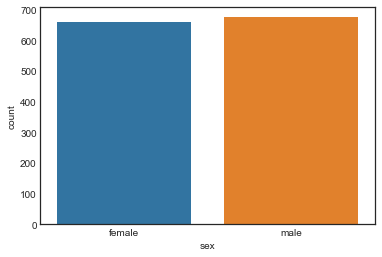

In [36]:
sns.countplot(x='sex',data=ds)

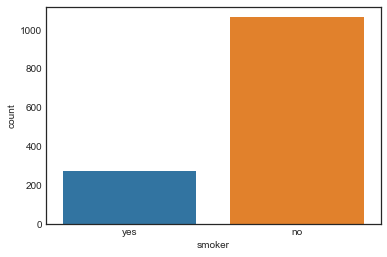

In [38]:
sns.countplot(x='smoker',data=ds)

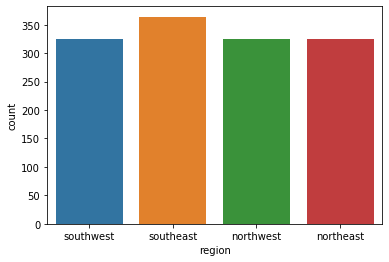

In [6]:
sns.countplot(x='region',data=ds)

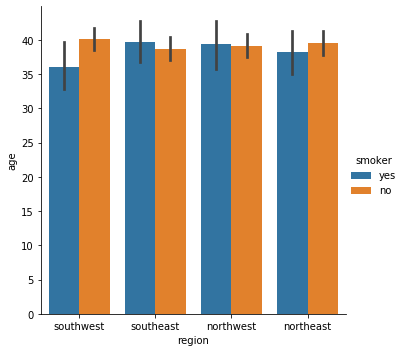

In [7]:
#Analyze the distribution of categorical columns by region and age
sns.catplot(x="region",y="age",hue="smoker",data=data,kind="bar")

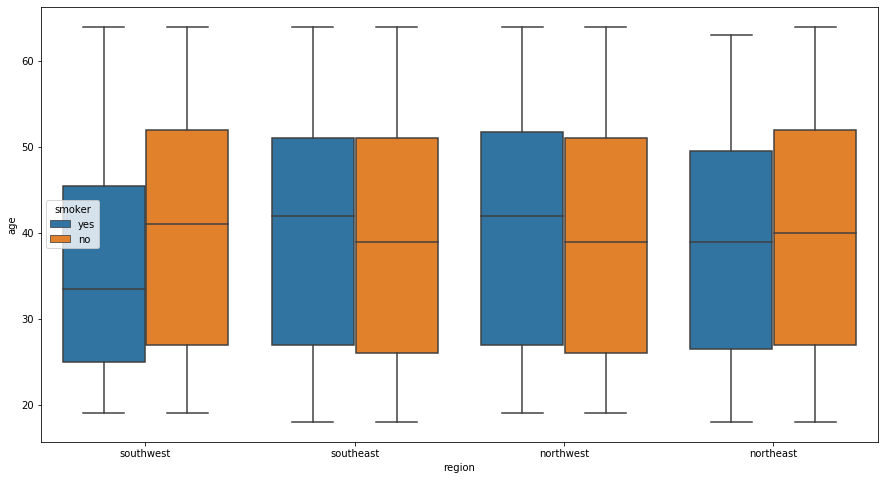

In [8]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="region",y="age",hue="smoker",data=data)

##### 3.9 Pair plot that includes all the columns of the data frame

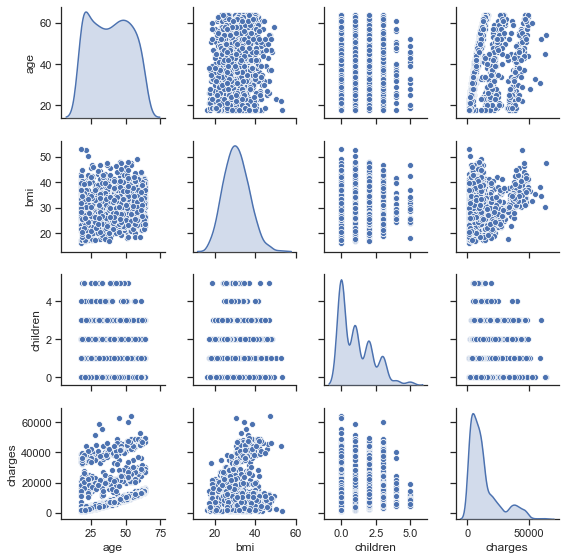

In [9]:
sns.set(style="ticks", color_codes=False)
g = sns.pairplot(data,height=2,diag_kind='kde')

#### 4. Answering the questions with statistical evidence


#### Question 1:- It is believed that people who smoke have higher charges than those who don’t, perform an analysis with the given data to confirm or disprove this. (or in other words : Do charges of people who smoke differ significantly from the people who don't?)

Following are the Hypothesis adopted to confirm/disapprove this question/theory.

Null Hypothesis:
Charges of people who smoke differ significantly from people who don't

Alternative Hypothesis:
Charges of people who smoke does not differ significantly from people who don't

Text(0.5, 1.0, 'Overall distribution of charges comparing smokers and non-smokers')

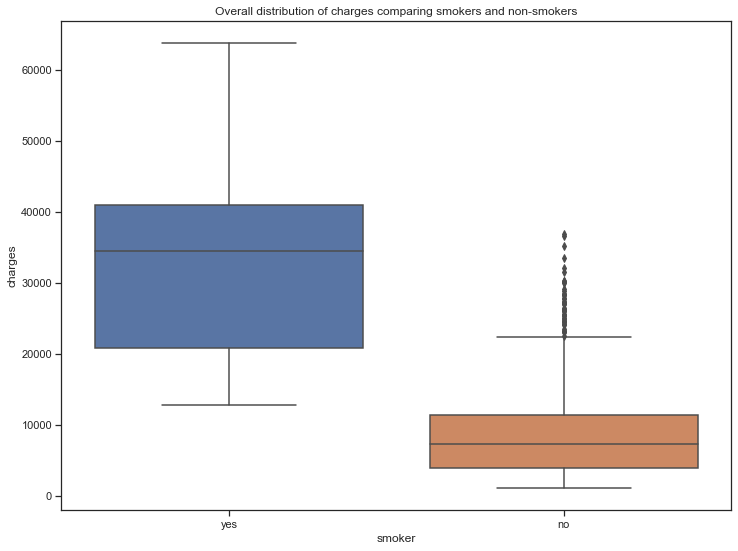

In [13]:
#boxplot showing the distribution of charges of smokers and non-smokers
plt.figure(figsize=(12,9))
sns.boxplot(x='smoker',y='charges',data=data)
plt.title("Overall distribution of charges comparing smokers and non-smokers")

In [24]:
# Replacing string values to numbers to run joinplot
data['sex'] = data['sex'].apply({'male':0, 'female':1}.get)
data['smoker'] = data['smoker'].apply({'yes':1, 'no':0}.get)
data['region'] = data['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [25]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


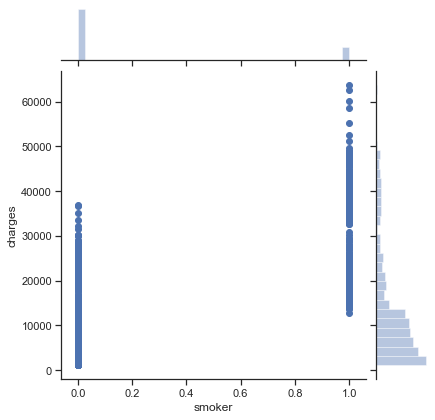

In [26]:
# Also checking the Correlation betweeen 'charges' and 'smoker' using joinplot
sns.jointplot(x=data['smoker'],y=data['charges'])

In [27]:
smoker_ = data[data['smoker']==1]
non_smoker = data[data['smoker']==0]

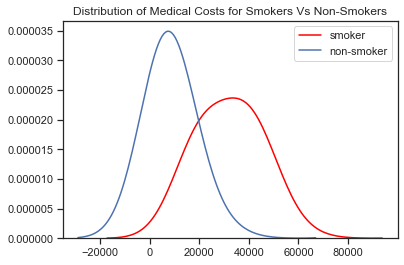

In [28]:
plt.title('Distribution of Medical Costs for Smokers Vs Non-Smokers')
ax = sns.kdeplot(smoker_['charges'], bw=10000, label='smoker', color='r')
ax = sns.kdeplot(non_smoker['charges'], bw=10000, label='non-smoker')
plt.show()

Analyzing the above distributions, it is very much evident that the charges of people who smoke differ significantly from
people who don't and therefore we fail to reject our null hypothesis

#### Question 2: Considering different regions, does the BMI of females differ significantly from that of males?

Following are the Hypothesis adopted to confirm/approve this quesion/theory. 

Null Hypothesis:
BMI of Males differ significantly from BMI of Females

Alternative Hypothesis
BMI of Males does not differ significantly from BMI of Females

In [29]:
male = data[data['smoker']==0]
female = data[data['smoker']==1]

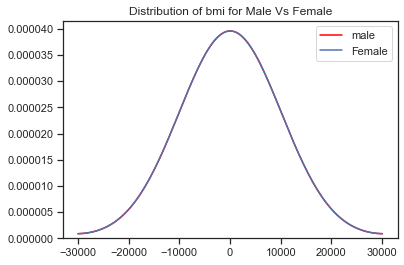

In [30]:
plt.title('Distribution of bmi for Male Vs Female')
ax = sns.kdeplot(male['bmi'], bw=10000, label='male',color='r')
ax = sns.kdeplot(female['bmi'], bw=10000, label='Female')
plt.show()

Text(0.5, 1.0, 'Comparing bmi of males vs females')

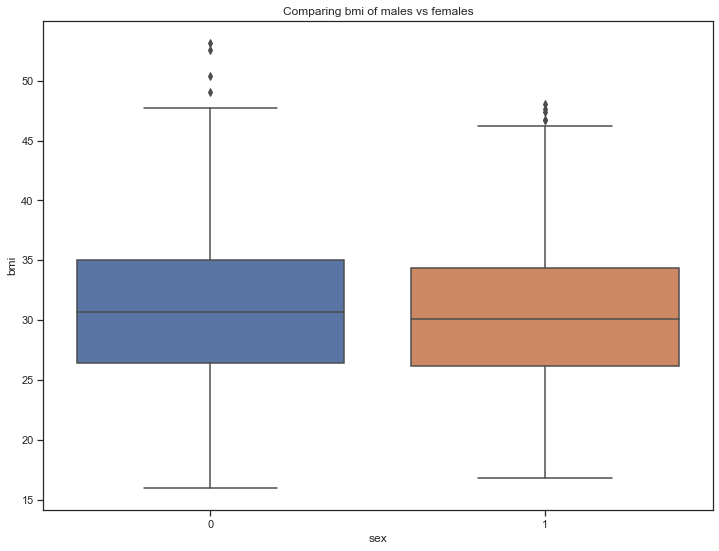

In [31]:
plt.figure(figsize=(12,9))
sns.boxplot(x='sex',y='bmi',data=data)
plt.title("Comparing bmi of males vs females")

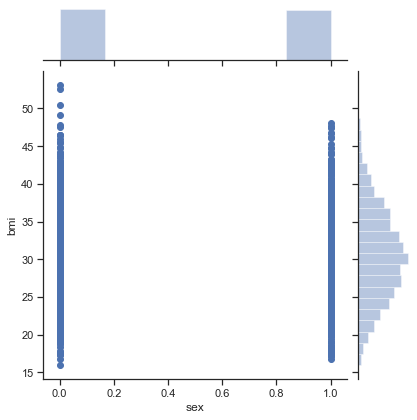

In [32]:
# Correlation betweeen 'charges' and 'smoker'
sns.jointplot(x=data['sex'],y=data['bmi'])

Analyzing the above distributions, it is evident tha the BMI of males is quite different from the BMI of the females. Therefore, we can conclude that the bmi of males differ significantly from bmi of females and therefore we fail to reject our null hypothesis





#### Question 3: Is the proportion of smokers significantly different in different genders?

Following are the Hypothesis adopted to confirm/approve this question/theory

Null Hypothesis:
Proportion of smokers is significantly different in different genders

Alternative Hypothesis:
Proportion of smokers is not significantly different in different genders

In [41]:
#For Convenience, we shall load the dataset again
data = pd.read_csv("C:\\Users\\EPAAGHL\\Documents\\Personal\\insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
data.count() #count of all the columns in the data set

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [36]:
#count of female smokers
female_smokers=(data['sex']=='female') & (data['smoker']=='yes')
female_smokers.value_counts()

False    1223
True      115
dtype: int64

In [37]:
#count of male smokers
male_smokers=(data['sex']=='male') & (data['smoker']=='yes')
male_smokers.value_counts()

False    1179
True      159
dtype: int64

In [38]:
#proportion of females who smoke
115/1338*100

8.594917787742899

In [39]:
#proportion of males who smoke
159/1338*100

11.883408071748878

From the above demonstration, the proportion of females who smoke are 8.59% while the proportion of males
who smoke are 11.88% (3.29% differece) which indicates that the proportion of smokers is significantly different
in different genders and we therefore fail to reject our null hypothesis.

---------------------------------------------------------------------------------------------------------------------------



#### Question 4. Considering the distribution of BMI across women with no children, one child, two children, three children, and four children the same?

Following are the Hypothesis adopted to confirm/approve this question/theory

Null Hypothesis:
Distribution of bmi across women with no children, one child and two children are the same

Alternative Hypothesis:
Distribution of bmi across women with no children, one child and two children, are not same

In [42]:
data_=data[data['children']<3]
data_.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


Text(0.5, 1.0, 'Distribution of bmi across women with no children, one child and two children')

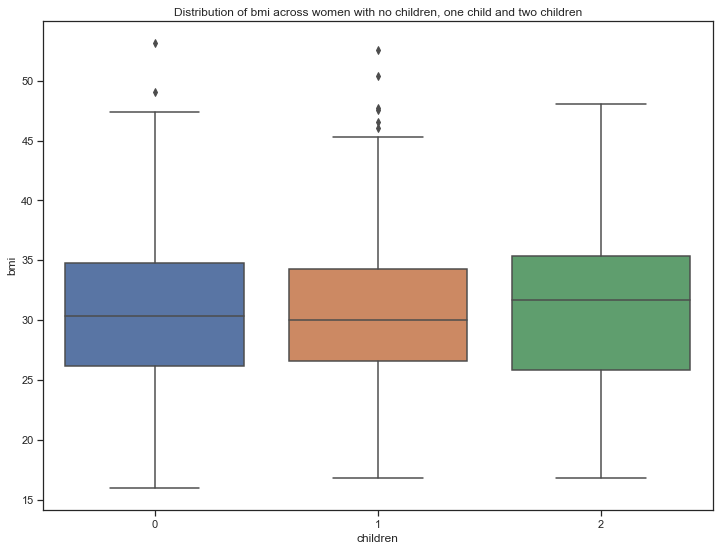

In [45]:
plt.figure(figsize=(12,9))
sns.boxplot(x=data_['children'],y=data_['bmi'],data=data_)
plt.title("Distribution of bmi across women with no children, one child and two children")

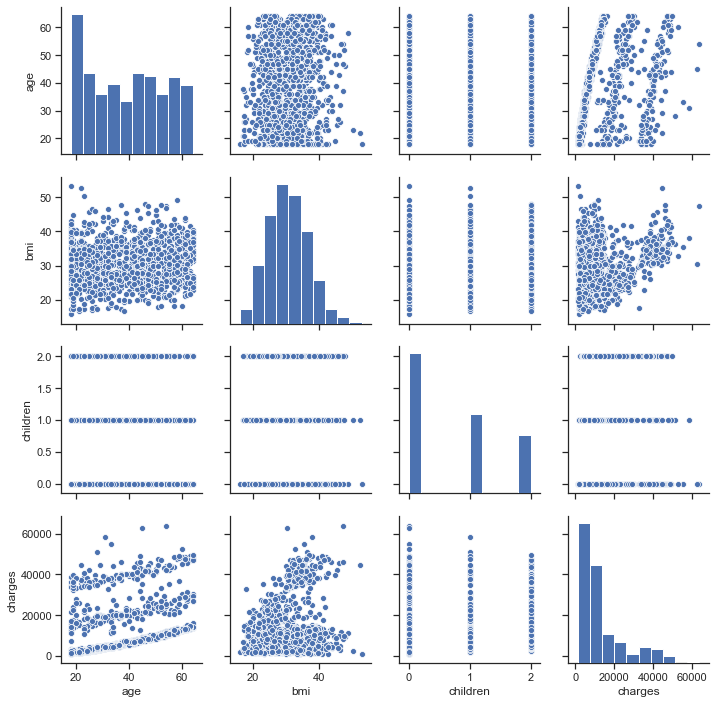

In [48]:
sns.pairplot(data_)

It is clearly seen from the above scatter plot as well as the boxplot and the pairplot that the distribution of bmi
across women with no children, one child and two children are not the same. We therefore fail to accept our null
hypothesis.